In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import pathlib
import tqdm
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
# ignore matplotlib warnings
import warnings
import matrixprofile as mp


import math
import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss
# adfuller library 
from statsmodels.tsa.stattools import adfuller

# Intro:
* a data structure & set of associated algorithms developed by the Keogh research group at UC-Riverside
*  tool to help solve this dual problem of anomaly detection (discords) and motif discovery.
*  robust, scalable, and largely parameter-free: we’ve seen it work for a wide range of metrics including website user data, order volume and other business-critical applications.
# Definition:
* a snippet of my data and slide it along the rest of the time series, how well does it overlap at each new position? (euclidean distance) 
* “Distance Profile.” : evaluate the Euclidean distance between a subsequence and every possible time series segment of the same length, building up what’s known as the snippet’s
# MPA: 3 steps
* Compute the Matrix Profile itself
* Discover something by leveraging the Matrix Profile that you’ve created. 
* Visualize your findings


In [ ]:
ts_moving_avg_diff['column_name'].values[EndOfTrainingIndex:]

array([13.87618807, 11.64273933, 16.2096538 , ..., -1.16115586,
        8.86201201, -2.38146286])

In [ ]:
data

array([-142.92884 , -164.93265 , -178.50742 , ...,   27.221281,
         34.907786,   21.102266])

In [ ]:
# Path
k = 30
path = pathlib.Path('./phase_1') / 'phase_1' 
df = pd.DataFrame(columns=['id','Discords'])
file=0
for path in sorted(path.iterdir()):
    file=file+1
    data = np.loadtxt(path)
    df_data = pd.DataFrame (data, columns = ['column_name'])
    number = path.stem.split('_')[0]
    EndOfTrainingIndex = int(path.stem.split('_')[-1])
    id = int(path.stem.split('_')[0])
   
    if (file<50):
        window_size=15
    elif (file<200):
        window_size=20
    else:
        window_size=50
    
        
    moving_avg = df_data.rolling(window_size).mean()
    ts_moving_avg_diff = df_data- moving_avg
    ts_moving_avg_diff.dropna(inplace=True)
    
   # ts_diff = df_data - df_data.shift()
   # ts_diff.dropna(inplace=True) 

    
    profile = mp.compute(df_data['column_name'].values[EndOfTrainingIndex:], window_size)
    profile = mp.discover.discords(profile, k = k, exclusion_zone = window_size)

    df = df.append({'Method':'Discord','id':id,'Length':len(data),'End Index':EndOfTrainingIndex,'Top 30 results':profile['discords'] + EndOfTrainingIndex},ignore_index=True)


In [ ]:
df[['id','End Index','Length','Method','Top 30 results']]

,id,End Index,Length,Method,Top 30 results
0,32,1000.0,7321.0,Discord,"[4931, 1240, 1092, 3518, 3216, 5873, 4114, 337..."
1,47,18000.0,29931.0,Discord,"[26293, 24106, 23219, 23997, 19658, 22974, 229..."
2,60,22000.0,65000.0,Discord,"[45785, 49316, 40676, 22086, 34778, 43125, 455..."
3,66,3700.0,9998.0,Discord,"[6697, 6094, 8849, 4286, 8824, 5568, 7164, 840..."
4,70,17555.0,56123.0,Discord,"[25301, 42524, 47675, 40399, 26120, 35376, 454..."
5,82,70000.0,195250.0,Discord,"[112499, 103492, 180189, 111632, 100753, 13094..."
6,86,20000.0,80000.0,Discord,"[67327, 20004, 50696, 29574, 48005, 66231, 777..."
7,89,100000.0,130001.0,Discord,"[105389, 123910, 113020, 104778, 113071, 12597..."
8,113,4000.0,8184.0,Discord,"[5382, 7202, 4495, 5354, 6594, 7746, 7183, 693..."
9,116,4000.0,8184.0,Discord,"[5563, 5537, 7202, 4495, 5354, 7746, 6594, 718..."


In [ ]:
results = pd.read_csv('./metadata.csv')
results= results.rename(columns={'data_id': 'id'})
test=pd.merge(results, df, on='id')
test

,id,name,train_end_idx,anomaly_start,anomaly_end,Discords,End Index,Length,Method,Top 30 results
0,32,DISTORTEDInternalBleeding4,1000,4675,5033,NaN,1000.0,7321.0,Discord,"[4931, 1240, 1092, 3518, 3216, 5873, 4114, 337..."
1,47,DISTORTEDPowerDemand4,18000,24005,24077,NaN,18000.0,29931.0,Discord,"[26293, 24106, 23219, 23997, 19658, 22974, 229..."
2,60,DISTORTEDgait2,22000,46500,46800,NaN,22000.0,65000.0,Discord,"[45785, 49316, 40676, 22086, 34778, 43125, 455..."
3,66,DISTORTEDinsectEPG2,3700,8000,8025,NaN,3700.0,9998.0,Discord,"[6697, 6094, 8849, 4286, 8824, 5568, 7164, 840..."
4,70,DISTORTEDltstdbs30791AI,17555,52600,52800,NaN,17555.0,56123.0,Discord,"[25301, 42524, 47675, 40399, 26120, 35376, 454..."
5,82,DISTORTEDresperation4,70000,128430,128431,NaN,70000.0,195250.0,Discord,"[112499, 103492, 180189, 111632, 100753, 13094..."
6,86,DISTORTEDsddb49,20000,67950,68200,NaN,20000.0,80000.0,Discord,"[67327, 20004, 50696, 29574, 48005, 66231, 777..."
7,89,DISTORTEDtiltAPB1,100000,114283,114350,NaN,100000.0,130001.0,Discord,"[105389, 123910, 113020, 104778, 113071, 12597..."
8,113,CIMIS44AirTemperature1,4000,5391,5392,NaN,4000.0,8184.0,Discord,"[5382, 7202, 4495, 5354, 6594, 7746, 7183, 693..."
9,116,CIMIS44AirTemperature4,4000,5549,5597,NaN,4000.0,8184.0,Discord,"[5563, 5537, 7202, 4495, 5354, 7746, 6594, 718..."


In [ ]:
test['Result']=False
test['Rank']=1000
test['Result']=False
test['Rank']=1000
for j in range(len(test)):

    for i in range(len(test['Top 30 results'][j])): 
        if test['Top 30 results'][j][i] >= test['anomaly_start'][j] and test['Top 30 results'][j][i] <= test['anomaly_end'][j] :
            test['Result'][j]=True
            test['Rank'][j]=i
            break  

In [ ]:
test[['id','Method','anomaly_start','anomaly_end','Top 30 results','Result','Rank']].head(10)

,id,Method,anomaly_start,anomaly_end,Top 30 results,Result,Rank
0,32,Discord,4675,5033,"[4931, 1240, 1092, 3518, 3216, 5873, 4114, 337...",True,0
1,47,Discord,24005,24077,"[26293, 24106, 23219, 23997, 19658, 22974, 229...",False,1000
2,60,Discord,46500,46800,"[45785, 49316, 40676, 22086, 34778, 43125, 455...",False,1000
3,66,Discord,8000,8025,"[6697, 6094, 8849, 4286, 8824, 5568, 7164, 840...",True,11
4,70,Discord,52600,52800,"[25301, 42524, 47675, 40399, 26120, 35376, 454...",False,1000
5,82,Discord,128430,128431,"[112499, 103492, 180189, 111632, 100753, 13094...",False,1000
6,86,Discord,67950,68200,"[67327, 20004, 50696, 29574, 48005, 66231, 777...",False,1000
7,89,Discord,114283,114350,"[105389, 123910, 113020, 104778, 113071, 12597...",False,1000
8,113,Discord,5391,5392,"[5382, 7202, 4495, 5354, 6594, 7746, 7183, 693...",False,1000
9,116,Discord,5549,5597,"[5563, 5537, 7202, 4495, 5354, 7746, 6594, 718...",True,0


In [ ]:
test = pd.read_csv('./df_Discord_ts_moving_avg_diff_phase1.csv')

In [ ]:
test[test['Rank']==0][['id','Method','Rank']].groupby(['id']).min()

,Method,Rank
id,,
7,Discord,0
10,Discord,0
28,Discord,0
31,Discord,0
110,Discord,0
111,Discord,0
112,Discord,0
118,Discord,0
127,Discord,0


In [ ]:
test.to_csv(r'.\df_Discord_originalData_phase1.csv')

In [ ]:
# Path
k = 30
path = pathlib.Path('./phase_1') / 'phase_1' 
df = pd.DataFrame(columns=['id','Discords'])
file=0
for path in sorted(path.iterdir()):
    file=file+1
    data = np.loadtxt(path)
    df_data = pd.DataFrame (data, columns = ['column_name'])
    number = path.stem.split('_')[0]
    EndOfTrainingIndex = int(path.stem.split('_')[-1])
    id = int(path.stem.split('_')[0])
   
    if (file<50):
        window_size=15
    elif (file<200):
        window_size=20
    else:
        window_size=50
    
        
    #moving_avg = df_data.rolling(window_size).mean()
    #ts_moving_avg_diff = df_data- moving_avg
    #ts_moving_avg_diff.dropna(inplace=True)
    
    ts_diff = df_data - df_data.shift()
    ts_diff.dropna(inplace=True) 

    
    profile = mp.compute(ts_diff['column_name'].values[EndOfTrainingIndex:], window_size)
    profile = mp.discover.discords(profile, k = k, exclusion_zone = window_size)

    df = df.append({'Method':'Discord','id':id,'Length':len(data),'End Index':EndOfTrainingIndex,'Top 30 results':profile['discords'] + EndOfTrainingIndex},ignore_index=True)


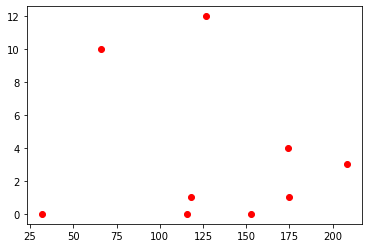

In [ ]:

import matplotlib.pyplot as plt
plt.plot(test[test['Result']==True][['data_id']],test[test['Result']==True][['Rank']],'ro')

## Evaluation